# k - Nearest Neighbors Algorithm (kNN) - Campus Recruitment


<ol>
<li><a href='#Introduction'>Introduction</a></li>
<li><a href='#Loading_Data'>Loading Data</a></li>
<li><a href='#Data_Analysis'>Data Analysis</a></li>
<li><a href='#Data_Preparation'>Data Preparation</a></li>
<li><a href='#kNN'>k-NN Execution</a></li>
<li><a href='#Evaluation'>Evaluation</a></li>
<li><a href='#Summary'>Summary</a></li>
</ol>

> # 1. Introduction <a id = "Introduction"></a>

I'm going to explore the dataset from "Campus Recruitment - Academic and Employability Factors influencing placement" provided by Ben Roshan D, MBA in Business Analytics at Jain University and Bangalore. I will work with the supervised machile learning algorithm called k-NN or <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">k-Nearest Neighbors</a>.


"This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students"

The dataset contains the following data:
<ul>
<li><b>sl_no</b> = Serial Number</li>
<li><b>gender</b> = Gender: Male='M', Female='F'</li>
<li><b>ssc_p</b> = Secondary Education percentage - 10th Grade</li>
<li><b>ssc_b</b> = Board of Education- Central/ Others</li>
<li><b>hsc_p</b> = Higher Secondary Education percentage - 12th Grade</li>
<li><b>hsc_b</b> = Board of Education - Central/ Others</li>
<li><b>hsc_s</b> = Specialization in Higher Secondary Education</li>
<li><b>degree_p</b> = Degree Percentage</li>
<li><b>degree_t</b> = Under Graduation(Degree type) - Field of degree education</li>
<li><b>workex</b> = Work Experience</li>
<li><b>etest_p</b> = Employability test percentage ( conducted by college)</li>
<li><b>specialisation</b> = Post Graduation(MBA)- Specialization</li>
<li><b>mba_p</b> = MBA percentage</li>
<li><b>status</b> = Status of placement- Placed/Not placed</li>
<li><b>salary</b> = Salary offered by corporate to candidates</li>
</ul>



# 2. Loading Data <a id = "Loading_Data"></a>

First we need to load some libraries and the dataset.

In [4]:
library('funModeling') 
library('Hmisc')
library('dummies')
library('corrplot')
library('gmodels')
library('class')
library('dummies')
library('tidyr')

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.3 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai

dummies-1.5.6 provided by Decision Patterns


corrplot 0.84 loaded



In [5]:
data <- read.csv(("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv"))

Let's explore the dataset.

In [6]:
head(data)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


In [7]:
str(data)

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

The dataset contains 215 observations of 15 variables: 
* 7 numerical variables: sl_no, ssc_p, hsc_p, degree_p, etest_p, mba_p and salary;
* 8 categorical variables: gender (Female, Male), ssc_b(Central, Others), hsc_b(Central, Others), hsc_s (Arts, Commerce, Science), degree_t (Comm&Mgmt, Others, Sci&Tech), workex (Yes, No), specialisation (Mkt&Fin, Mkt&Hr) and status (Placed, Not Placed).


The dataset response is on the variable called "status" and represents the binary response for the placement of the students: Placed or Not Placed.



We can see there are some missing values at the salary column, corresponding to the students that weren't placed. 

Since we are interested on predicting the student's placement we the columns <i>sl_no</i> and <i>salary</i> provide no interest to us.




In [8]:
#Dropping sl_no column and salary columns
data = data[,!names(data) %in% 'sl_no']
data = data[,!names(data) %in% 'salary']
data[data==''] <- NA #To make sure missing data is NA

# 3. Data Analysis <a id = "DataAnalysis"></a>

For a better understanding of our dataset, I will briefly analyse it and provide some visualizations. Firstly, I will have a look at the summary to provide a better understanding of the data and how it is distributed.

In [9]:
summary(data)

 gender      ssc_p           ssc_b         hsc_p           hsc_b    
 F: 76   Min.   :40.89   Central:116   Min.   :37.00   Central: 84  
 M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90   Others :131  
         Median :67.00                 Median :65.00                
         Mean   :67.30                 Mean   :66.33                
         3rd Qu.:75.70                 3rd Qu.:73.00                
         Max.   :89.40                 Max.   :97.70                
      hsc_s        degree_p          degree_t   workex       etest_p    
 Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141   Min.   :50.0  
 Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74   1st Qu.:60.0  
 Science : 91   Median :66.00   Sci&Tech : 59             Median :71.0  
                Mean   :66.37                             Mean   :72.1  
                3rd Qu.:72.00                             3rd Qu.:83.5  
                Max.   :91.00                             Max.   :98.0  
 speci

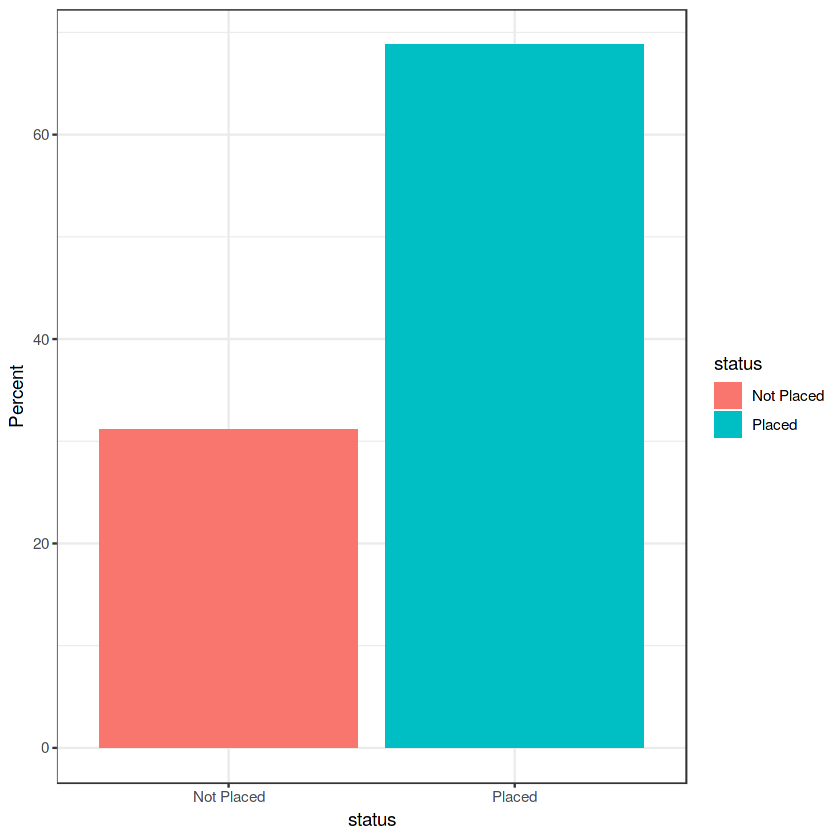

In [10]:
theme_set(theme_bw())
ggplot(data, aes(x = status, fill = status)) +  
  geom_bar(aes(y = ((..count..)/sum(..count..)) * 100)) +
  ylab("Percent")

Around 64% of the students in the dataset got "Placed".

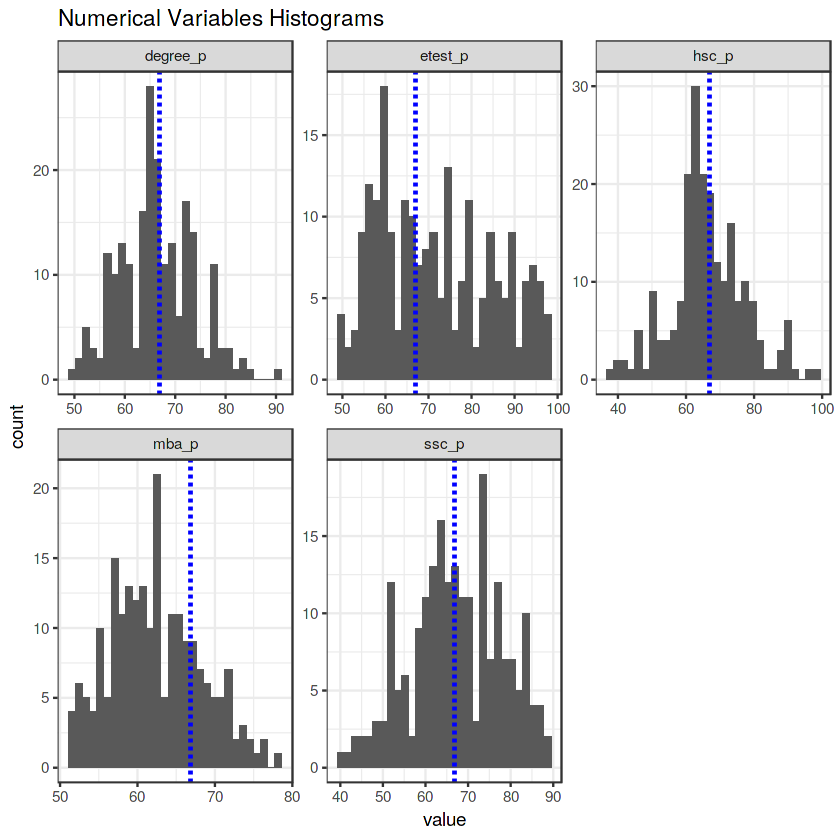

In [11]:
#Selecting only the numerical data
num_data = subset(data, select = c(2,4,7,10,12)) 

num_data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(bins = 30) +
    geom_vline(aes(xintercept=mean(value)), color="blue", linetype="dashed", size=1)+
    ggtitle("Numerical Variables Histograms")


From the above histograms we can see how the students different grades are distributed and its means (traces in dotted-blue).

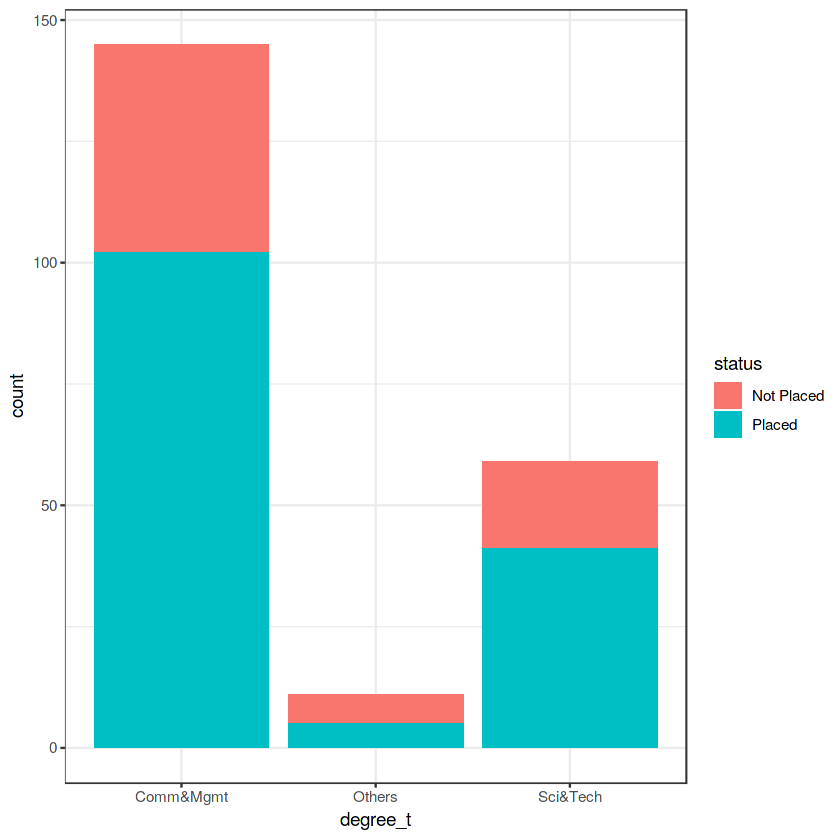

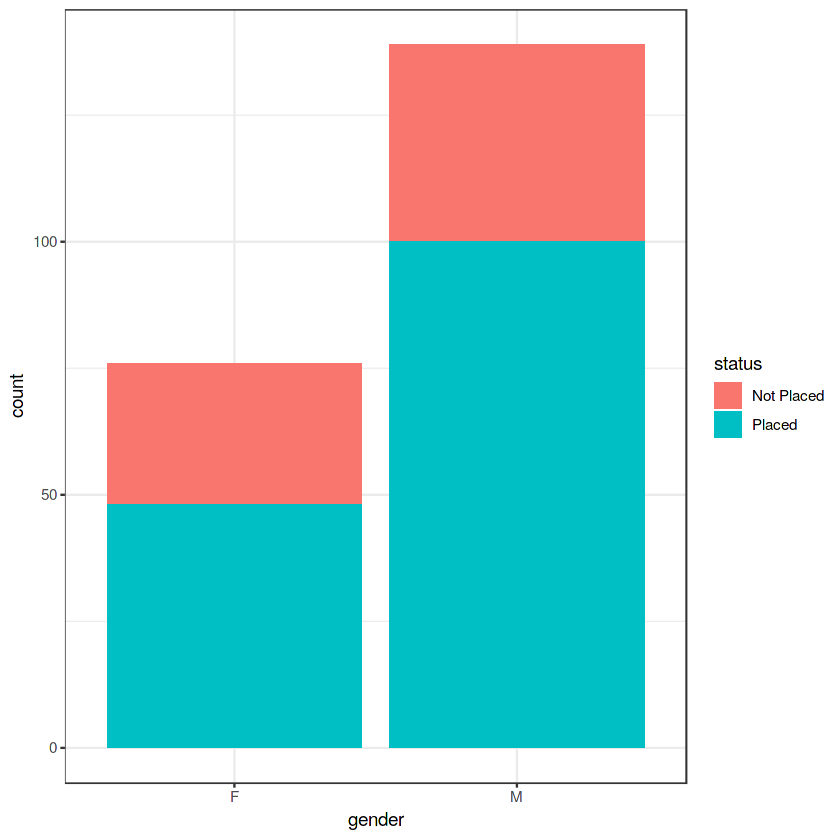

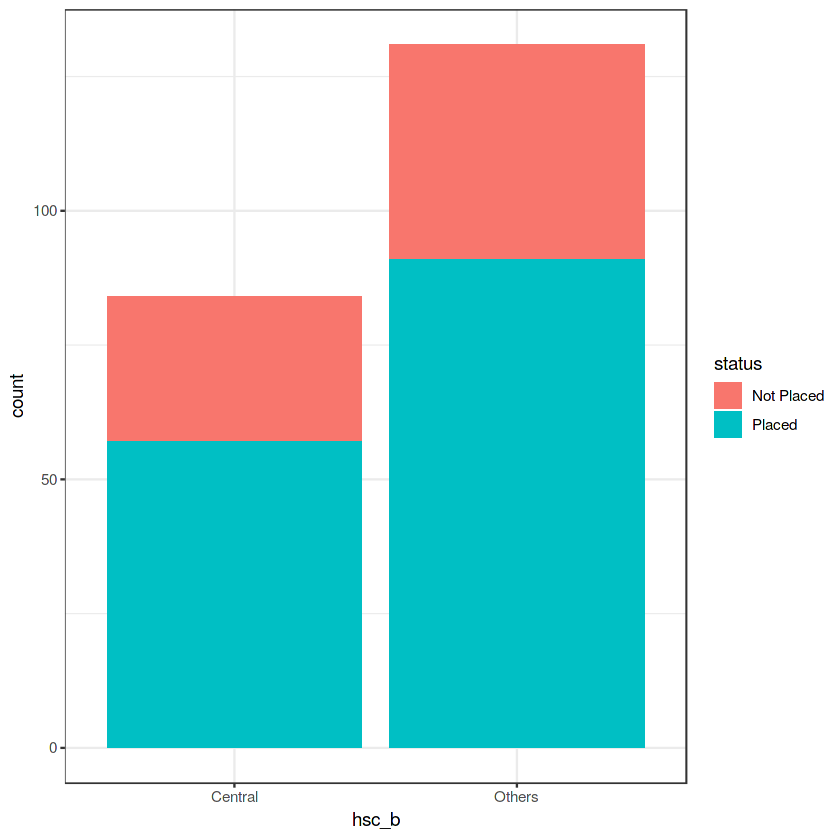

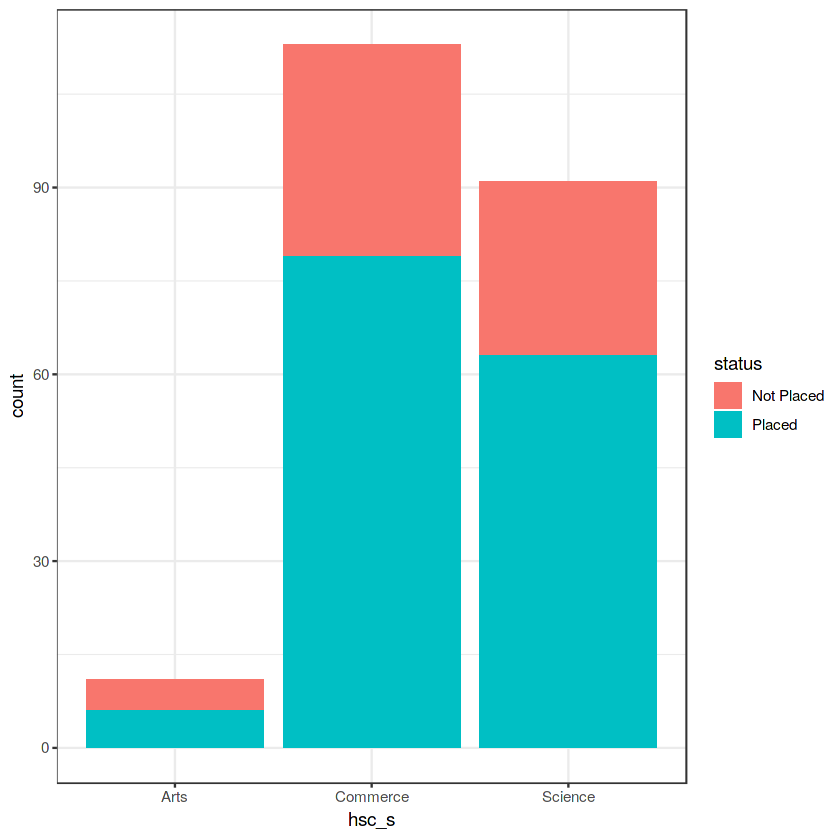

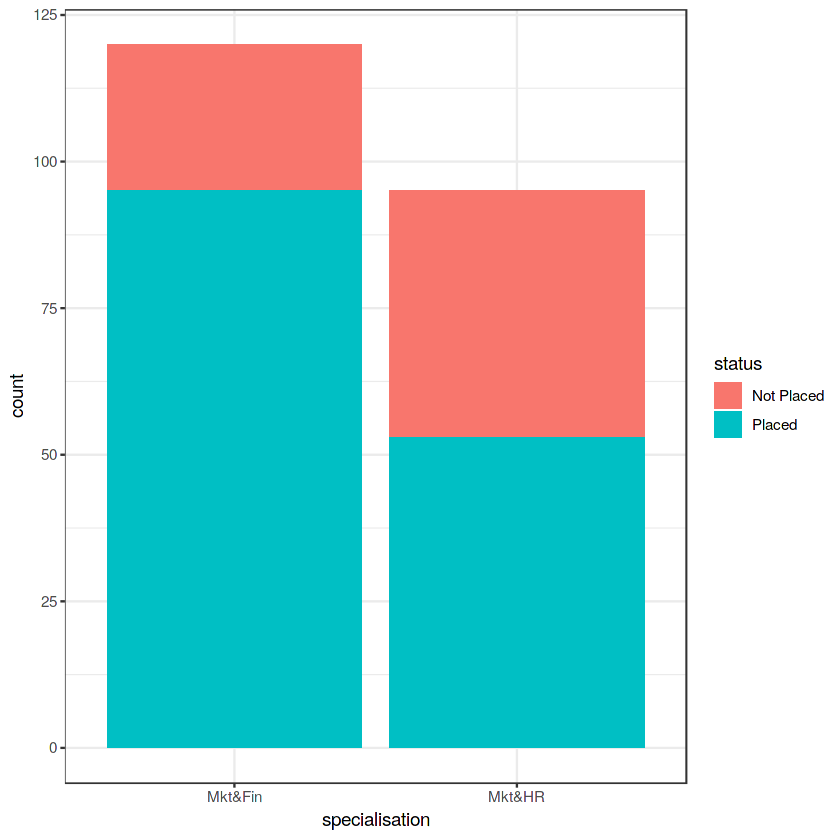

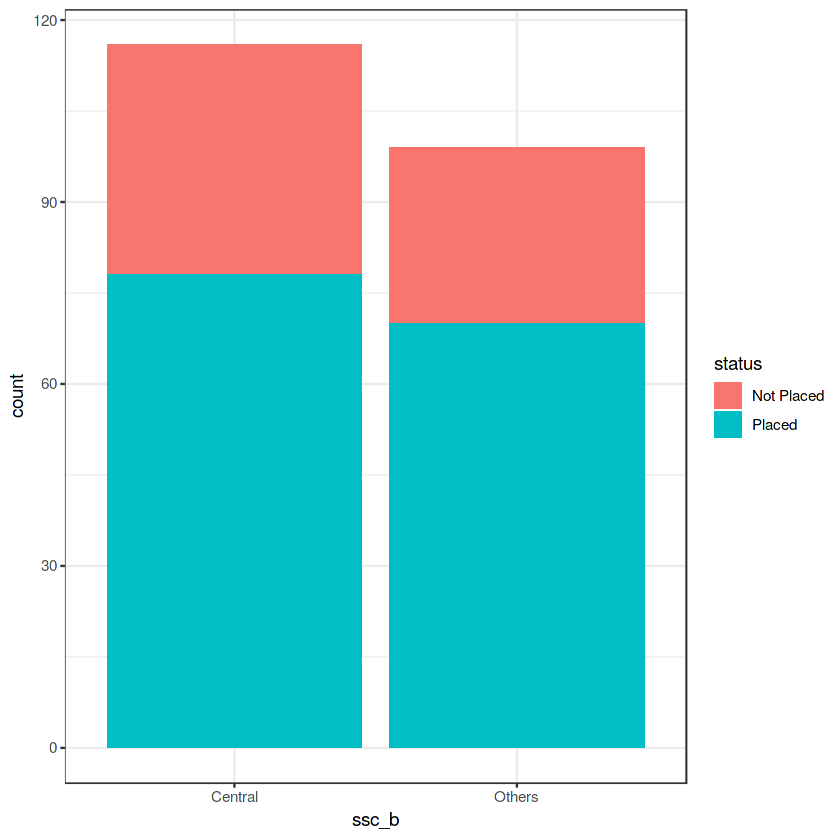

   degree_t frequency percentage cumulative_perc
1 Comm&Mgmt       145      67.44           67.44
2  Sci&Tech        59      27.44           94.88
3    Others        11       5.12          100.00

  gender frequency percentage cumulative_perc
1      M       139      64.65           64.65
2      F        76      35.35          100.00

    hsc_b frequency percentage cumulative_perc
1  Others       131      60.93           60.93
2 Central        84      39.07          100.00

     hsc_s frequency percentage cumulative_perc
1 Commerce       113      52.56           52.56
2  Science        91      42.33           94.89
3     Arts        11       5.12          100.00

  specialisation frequency percentage cumulative_perc
1        Mkt&Fin       120      55.81           55.81
2         Mkt&HR        95      44.19          100.00

    ssc_b frequency percentage cumulative_perc
1 Central       116      53.95           53.95
2  Others        99      46.05          100.00

  workex frequency perce

[1] "Variables processed: degree_t, gender, hsc_b, hsc_s, specialisation, ssc_b, workex"

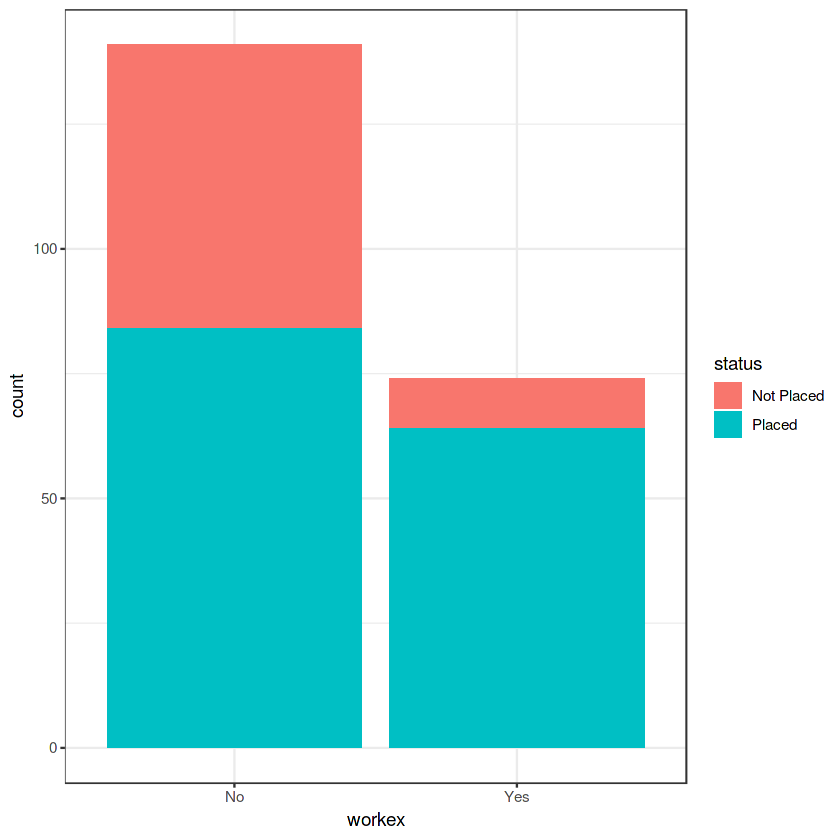

In [12]:
ggplot(data) + geom_bar(aes(x = degree_t, fill = status))
ggplot(data) + geom_bar(aes(x = gender, fill = status))
ggplot(data) + geom_bar(aes(x = hsc_b, fill = status))
ggplot(data) + geom_bar(aes(x = hsc_s, fill = status))
ggplot(data) + geom_bar(aes(x = specialisation, fill = status))
ggplot(data) + geom_bar(aes(x = ssc_b, fill = status))
ggplot(data) + geom_bar(aes(x = workex, fill = status))

freq(data = data, input= c('degree_t','gender', 'hsc_b', 'hsc_s', 'specialisation', 'ssc_b', 'workex'), plot = FALSE)

From the above barcharts we can say that :
* Most of the students of this university had undergraduation in Comm&Mgmt, and less than half had came from Sci&Tech and only 11 from others;
* Approximately 2/3 of the students are Male; 
* In terms of board of education for both Secondary and Higher Education is nearly equaly distributed;
* Only 11 students had specialization in Higher Secondary Education for Arts, the others were split between Commerce and Science;
* Post Grad specialization is evenly distributed but students with "Mkt&Fin" have a higher chance of be placed; 
* Higher and Secundary Board of Education are nearly even distributed;
* 2/3 of the students didn't have any work experience and most of the students that had work experience got Placed;



It makes sense that the work experience is highly valued for the student placement, as well as for higher grades and that is what I'm going to try to find out now.

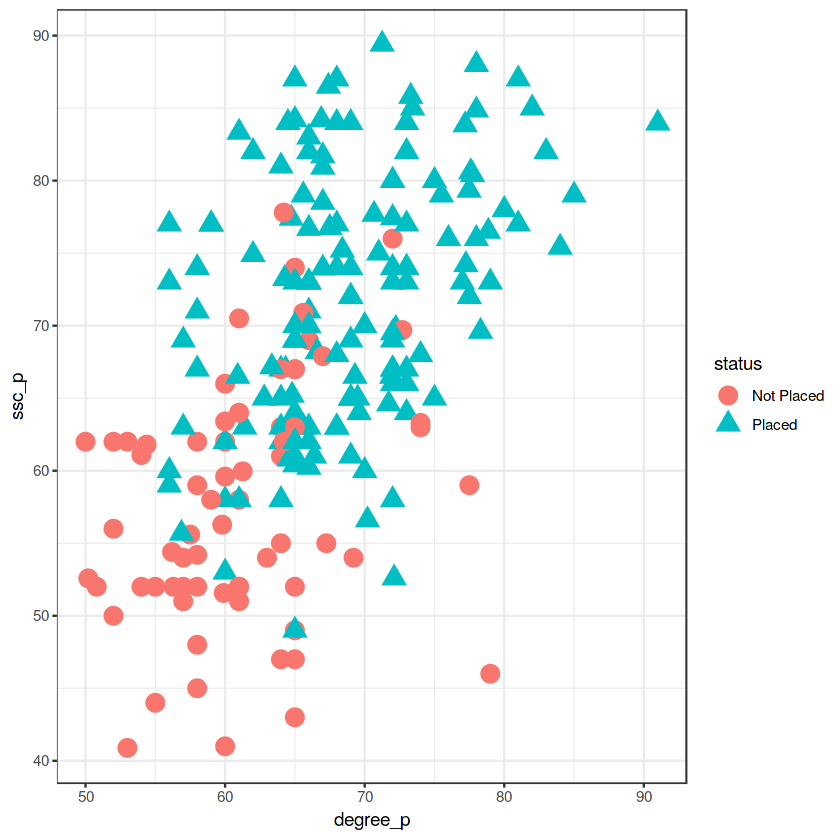

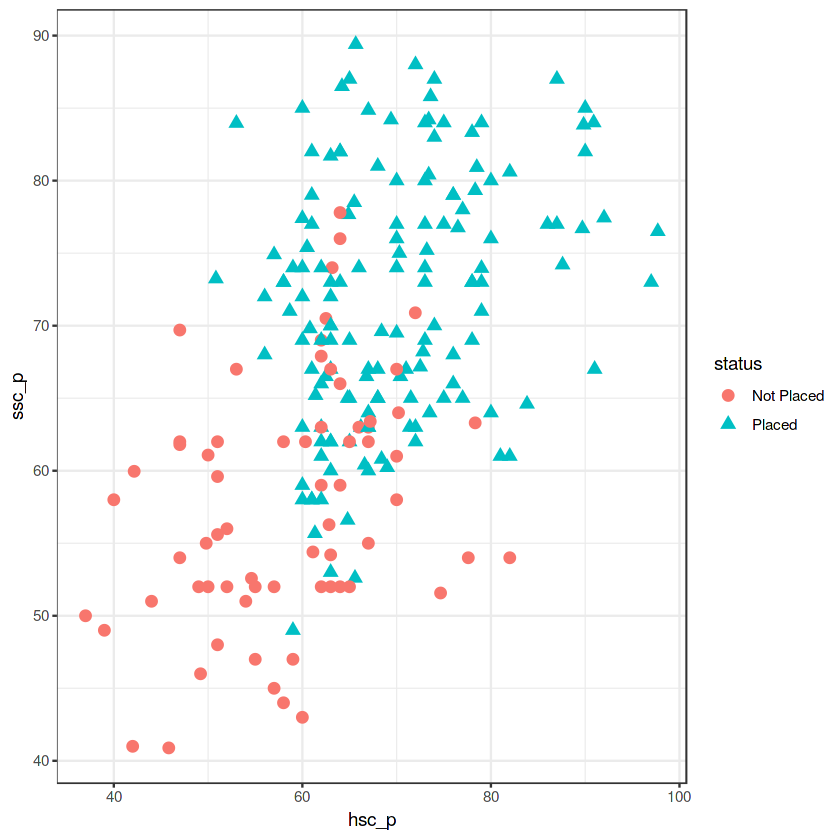

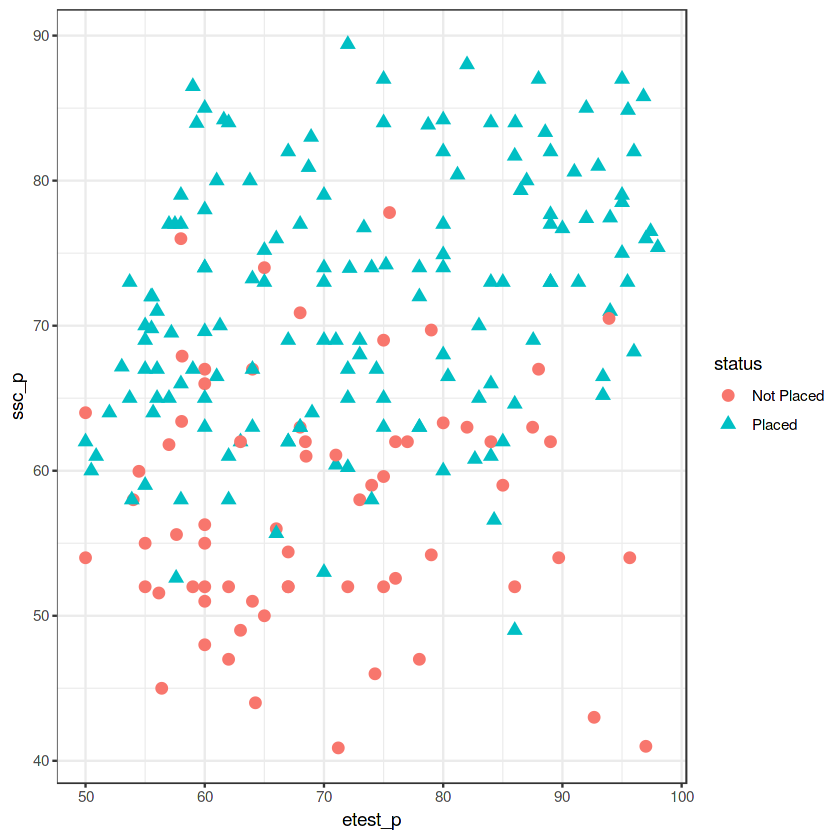

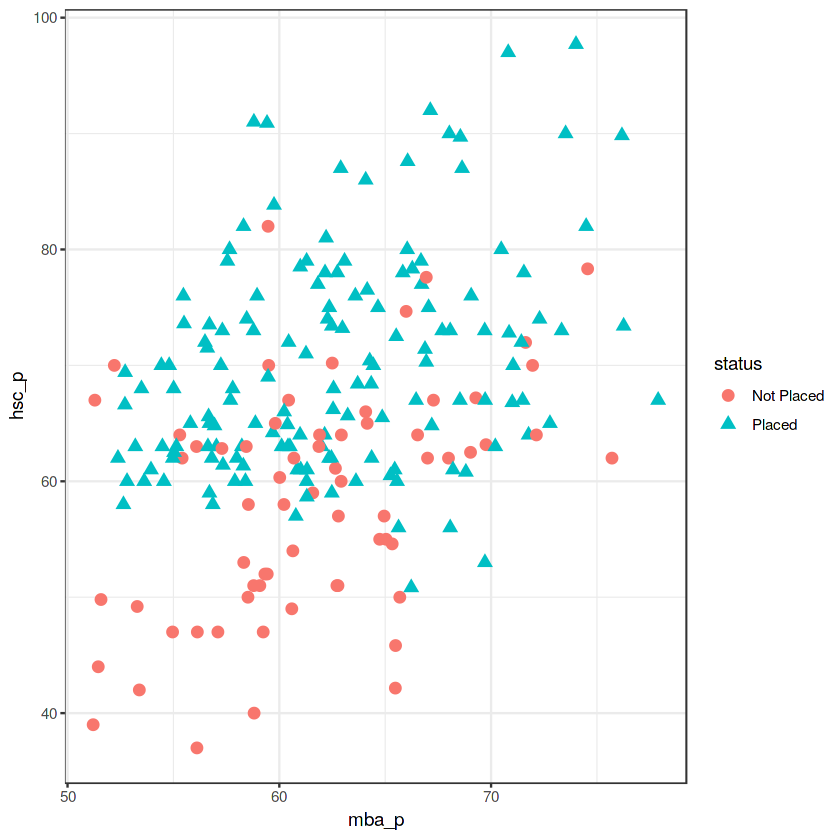

In [13]:
ggplot(data, aes(x=degree_p, y=ssc_p,shape=status, color=status))+
    geom_point(size=5)
ggplot(data, aes(x=hsc_p, y=ssc_p,shape=status, color=status)) +
    geom_point(size=3) 
ggplot(data, aes(x=etest_p, y=ssc_p,shape=status, color=status)) +
    geom_point(size=3) 
ggplot(data, aes(x=mba_p, y=hsc_p,shape=status, color=status)) +
    geom_point(size=3) 

As expected we can see a high correlation between the <b>High Secondary Education percentage</b>, <b> Secondary Education Percentage </b> and <b> Degree Percentage </b> on the students placement. In the other hand, there seems not to be such a high correlation with the <b>MBA percentage </b> and the <b>Employability test percentage </b>.

Let's have a look to the variables correlation matrix.

In [14]:
categorical_s = c('gender','hsc_s','ssc_b','hsc_b','ssc_s','degree_t','workex','specialisation','status')#List of all categorical variables
results_s <- fastDummies::dummy_cols(data, select_columns = categorical_s) #creating the dummy columns
res_s <- results_s[, !(names(results_s) %in% categorical_s)] #deleting initial columns


Warning message in fastDummies::dummy_cols(data, select_columns = categorical_s):
“NOTE: The following select_columns input(s) is not a column in data.
	”


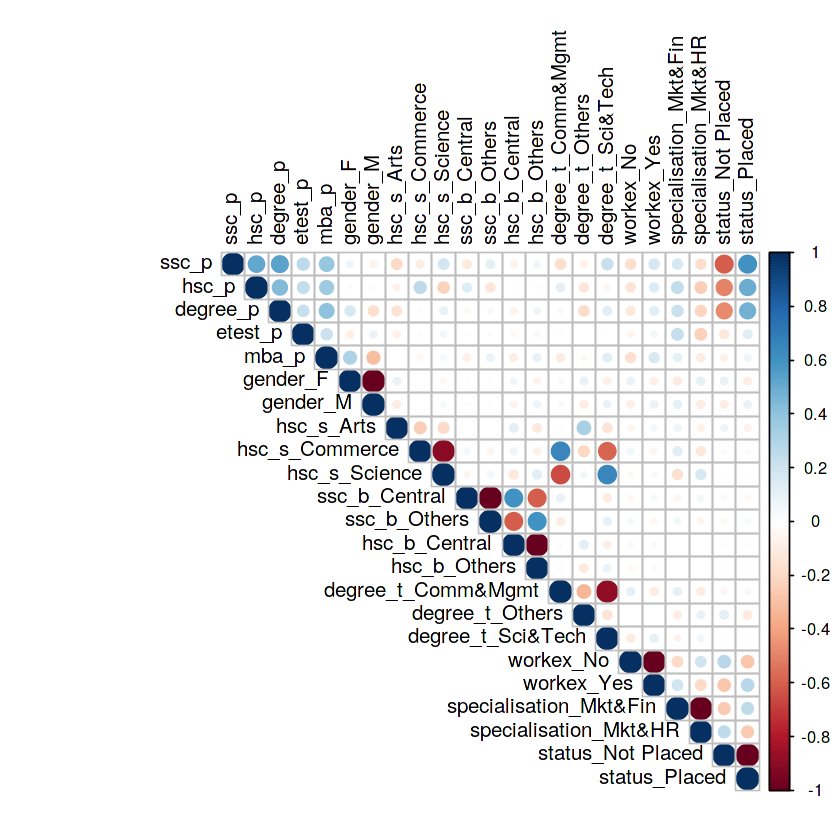

In [15]:
corrplot(cor(res_s), type = 'upper', method = 'circle',  tl.col = 'black',  p.mat = res_s$P, sig.leve = 0.05)

From the correlation matrix we can confirm that all the grades apart from the mba have a high correlation with the student's placement, as well as the specialization, being positevely correlated for <i>"Mkt&Fin"</i> and negatevily for <i>"Mkt&HR"</i>.

# 4. Data Preparation <a id = "Data_Preparation"></a>

First we need to transform all our categorical variables (apart from our target variable: <b>status</b>) into numerical by creating dummy bolooen columns.

In [16]:
categorical = c('gender','hsc_s','ssc_b','hsc_b','ssc_s','degree_t','workex','specialisation')
results <- fastDummies::dummy_cols(data, select_columns = categorical) #creating the dummy columns
res <- results[, !(names(results) %in% categorical)] #deleting initial columns


Warning message in fastDummies::dummy_cols(data, select_columns = categorical):
“NOTE: The following select_columns input(s) is not a column in data.
	”


Afterwards we need to normalize the quantitative variables to express them in the same range of values.

In [17]:
#Normalize() funciton
normalize <- function(x) {
num <- x - min(x)
denom <- max(x) - min(x)
return (num/denom)
}

# Normalize our placement dataset
plac_norm <- as.data.frame(lapply(res[,c(1:5,7:22)], normalize)) #all columns apart from status (column 6)


Then we split the data set into two: a training set(2/3) and a test set(1/3). 
The first is used to train the model, while the second is used to evaluate the trained model.

In [18]:
set.seed(1234)
#Training set will be 2/3 of original data set
ind <- sample(2, nrow(plac_norm), replace=TRUE, prob=c(0.666, 0.334))

plac.training <- plac_norm[ind == 1,]
plac.test <- plac_norm[ind == 2,]


Creating a vector for each train/test dataset with our target variable "status".

In [19]:
plac.trainLabels <- res[ind==1,6] #column 6 is our target.
plac.testLabels <- res[ind==2,6]

# 5. k-NN Execution<a id = "kNN"></a>

Now we want to find the k nearest neighbors of our training set.

We will be using the `knn()` function, which uses the Euclidian distance measure in order to find the k-nearest neighbors to our new, unknown instance. Here, <i>k</i> parameter needs to be set.


In [20]:
# Execution of k-NN with k = 1
knn_1 <- knn(plac.training, plac.test, plac.trainLabels, k=1, prob = TRUE)

# Execution of k-NN with k = 2
knn_2 <- knn(plac.training, plac.test, plac.trainLabels, k=2, prob = TRUE)

# 6. Evaluation<a id = "Evaluation"></a>

To evaluate our model we will use a confusion matrix and the calculated model accuracy with different values of <i>k</i> to study which one offers the best result.

In [21]:
# Accuracy of KnnTestPrediction for k = 1
round(sum(knn_1==plac.testLabels)/length(plac.testLabels)*100,2)


# Confusion matrix of KnnTestPrediction for k = 1
cm <- table(plac.testLabels, knn_1)

# Precision of KnnTestPrediction for k = 1 of False Posites
round((cm[2,2]/(cm[2,2]+cm[2,1]))*100,2)

cm

[1] 65.08

[1] 73.81

               knn_1
plac.testLabels Not Placed Placed
     Not Placed         10     11
     Placed             11     31

We can interpret the matrix:
<ul>
    <li>10 of the 21 students in the test data are correctly predicted as "Not Placed", whereas the reamining 11 are misclassified;</li>
    <li>31 of the 42 students in the test data are correctly predicted as "Placed" and 11 are misclassfied.</li>
    <li>giving an accuracy of 65.08%</li>
    <li>giving a precision of 73.81%</li>
</ul>

The model is doing a decent job predicting students to be placed (which is what we are most interested on) but doing a bad job on identifying students that weren't placed. 

On the run below with a k = 2 the model accuracy is the same, but it is doing a worse job since it decreased the number predicted "Placed" students, meaning that is increasing the "False Positives".

Our goal is to correctly predict the students that will be placed and maxime the precision.

In [22]:
# Accuracy of KnnTestPrediction for k = 2
round(sum(plac.testLabels==knn_2)/length(plac.testLabels)*100,2)

# Confusion matrix of KnnTestPrediction for k = 2
cm <- table(plac.testLabels, knn_2)

round((cm[2,2]/(cm[2,2]+cm[2,1]))*100,2)

cm

[1] 65.08

[1] 71.43

               knn_2
plac.testLabels Not Placed Placed
     Not Placed         11     10
     Placed             12     30

To graphically show which values of `k` give us the best classification, we can plot <b>"Accuracy vs k number of Neighbors" </b>

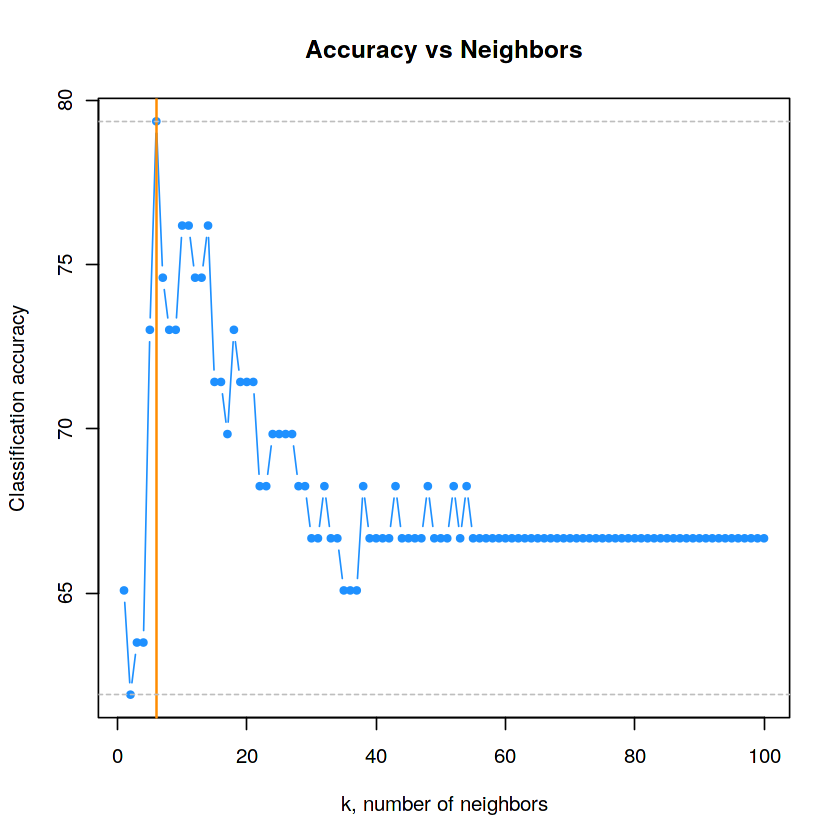

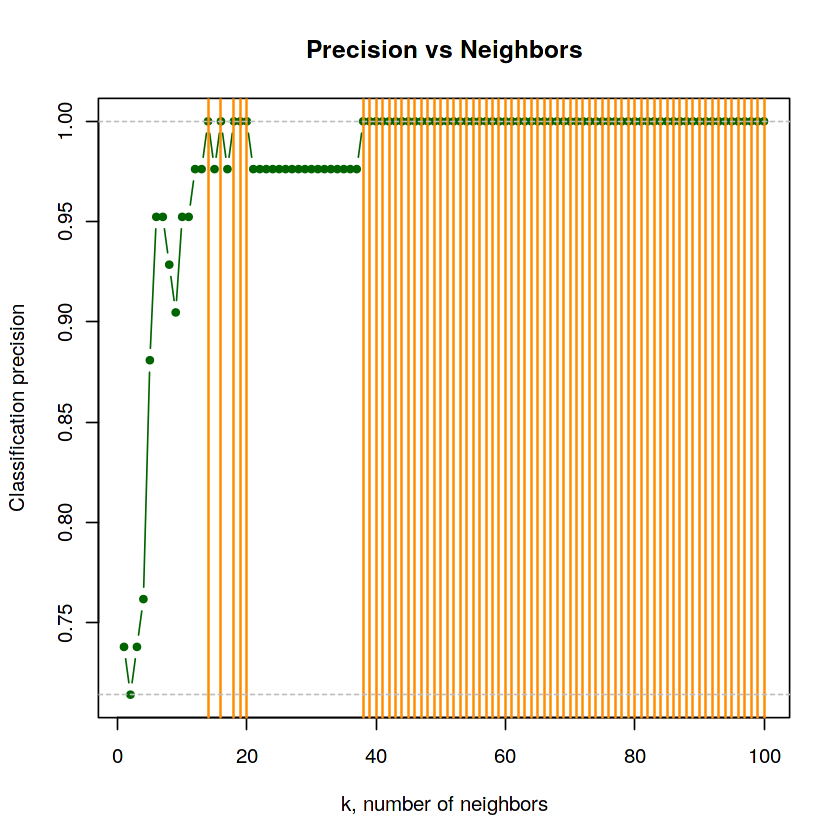

In [27]:
# Creating the variables
KnnTestPrediction <- list()
accuracy <- numeric()
precision <- numeric()

# Simulating from k=1 to k=100...
for(k in 1:100){

  # KnnTestPrediction for each k
  KnnTestPrediction[[k]] <- knn(plac.training, plac.test, plac.trainLabels, k, prob=TRUE)
    
  # Accuracy for each k   
  accuracy[k] <- sum(KnnTestPrediction[[k]]==plac.testLabels)/length(plac.testLabels)*100
  
  #Precision for each k
  precision[k] <- sum(KnnTestPrediction[[k]]=="Placed" & plac.testLabels=="Placed")/(sum((plac.testLabels=="Placed")))
}

# Accuracy vs number of k
plot(accuracy, type="b", col="dodgerblue", cex=1, pch=20,
     xlab="k, number of neighbors", ylab="Classification accuracy", 
     main="Accuracy vs Neighbors")

# line for k with best accuracy
abline(v=which(accuracy==max(accuracy)), col="darkorange", lwd=1.5)

# line for max accuracy seen
abline(h=max(accuracy), col="grey", lty=2)

# line for min accuracy seen
abline(h=min(accuracy), col="grey", lty=2)


# Accuracy vs number of k
plot(precision, type="b", col="darkgreen", cex=1, pch=20,
     xlab="k, number of neighbors", ylab="Classification precision", 
     main="Precision vs Neighbors")

# line for k with best precision
abline(v=which(precision==max(precision)), col="darkorange", lwd=1.5)

# line for max accuracy seen
abline(h=max(precision), col="grey", lty=2)

# line for min accuracy seen
abline(h=min(precision), col="grey", lty=2)

Using `k=6`

In [33]:
# Execution of k-NN with k = 6
knn <- knn(plac.training, plac.test, plac.trainLabels, k=6, prob = TRUE)

# Accuracy of KnnTestPrediction for k = 6
round(sum(plac.testLabels==knn)/length(plac.testLabels)*100,2)

#Precision of KnnTestPrediction for k = 6

round(sum(plac.testLabels == "Placed" & knn == "Placed")/sum((plac.testLabels=="Placed")),2)

# Confusion matrix of KnnTestPrediction for k = 6
table(plac.testLabels, knn)

[1] 80.95

[1] 0.95

               knn
plac.testLabels Not Placed Placed
     Not Placed         11     10
     Placed              2     40

To reach the maximum accuracy with this model the `k` value is <b>6</b>. The model is doing a great job with an accuracy of 81% and only mispredicting 2 "Placed" student.


We could achieve higher precision of 100% with k > 14 but we could be suffering from overfitting our data.

# 7. Summary<a id = "Summary"></a>

The found k-NN model is doing a good job on the prediction of the students placed with an accuarcy of <b>81%</b> and prediction of <b> 95% </b>, where the max accuracy is obtained with `k = 6`.

In order to try to further improve the model we could do further analysis on variable reduction to see how it performs. 